# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.3
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bi

In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [6]:
import cv2
import imghdr

In [11]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/data'

In [12]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [23]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 3. Load Data

In [14]:
import numpy as np
from matplotlib import pyplot as plt

In [26]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/data')

Found 308 files belonging to 2 classes.


In [27]:
data_iterator = data.as_numpy_iterator()
print(data_iterator)

In [28]:
batch = data_iterator.next()

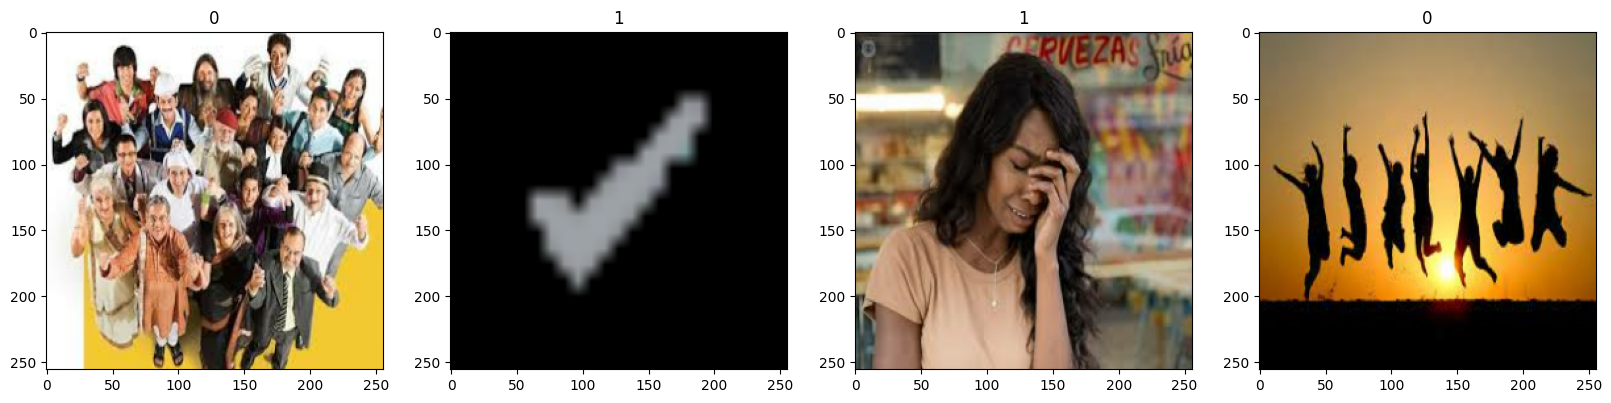

In [29]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [30]:
data = data.map(lambda x,y: (x/255, y))

In [31]:
data.as_numpy_iterator().next()

(array([[[[0.3529412 , 0.11372549, 0.03921569],
          [0.35226715, 0.11372549, 0.0395527 ],
          [0.34920344, 0.11372549, 0.04108456],
          ...,
          [0.1254902 , 0.05098039, 0.02745098],
          [0.1254902 , 0.05098039, 0.02745098],
          [0.1254902 , 0.05098039, 0.02745098]],
 
         [[0.35530025, 0.11541054, 0.03685662],
          [0.35459727, 0.11538158, 0.03713571],
          [0.3514019 , 0.11524993, 0.03840428],
          ...,
          [0.12582721, 0.0513174 , 0.02778799],
          [0.12582721, 0.0513174 , 0.02778799],
          [0.12582721, 0.0513174 , 0.02778799]],
 
         [[0.36602327, 0.12306985, 0.02613358],
          [0.36518866, 0.12290925, 0.02614938],
          [0.3613949 , 0.12217922, 0.02622118],
          ...,
          [0.12735906, 0.05284926, 0.02931985],
          [0.12735906, 0.05284926, 0.02931985],
          [0.12735906, 0.05284926, 0.02931985]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

# 5. Split Data

In [32]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [33]:
train_size

7

In [34]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [35]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [37]:
model = Sequential()

In [38]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [39]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [41]:
logdir='logs'

In [42]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [43]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 27s 3s/step - loss: 1.4381 - accuracy: 0.4866 - val_loss: 0.7132 - val_accuracy: 0.5625
Epoch 2/20
7/7 [==============================] - 28s 4s/step - loss: 0.7013 - accuracy: 0.5045 - val_loss: 0.6864 - val_accuracy: 0.5000
Epoch 3/20
7/7 [==============================] - 38s 5s/step - loss: 0.6683 - accuracy: 0.5402 - val_loss: 0.6422 - val_accuracy: 0.5469
Epoch 4/20
7/7 [==============================] - 41s 5s/step - loss: 0.6478 - accuracy: 0.6027 - val_loss: 0.6375 - val_accuracy: 0.6562
Epoch 5/20
7/7 [==============================] - 28s 4s/step - loss: 0.6056 - accuracy: 0.7455 - val_loss: 0.5018 - val_accuracy: 0.8438
Epoch 6/20
7/7 [==============================] - 29s 4s/step - loss: 0.5212 - accuracy: 0.7634 - val_loss: 0.4018 - val_accuracy: 0.8438
Epoch 7/20
7/7 [==============================] - 29s 4s/step - loss: 0.4724 - accuracy: 0.7946 - val_loss: 0.4335 - val_accuracy: 0.8594
Epoch 8/20
7/7 [==================

# 8. Plot Performance

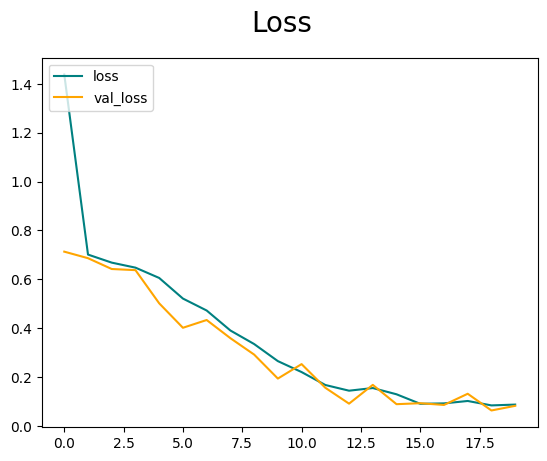

In [45]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

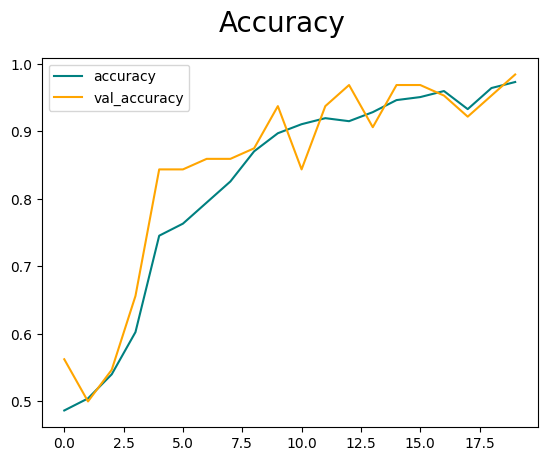

In [46]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [47]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [48]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [49]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 422ms/step


In [50]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [51]:
import cv2

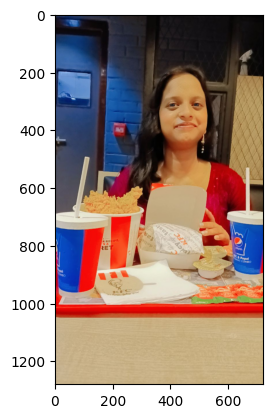

In [57]:
img = cv2.imread('/content/Snapchat-952001173.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

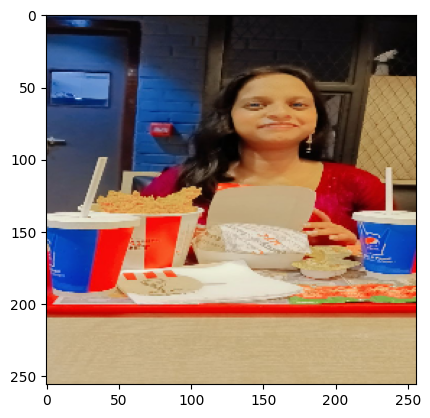

In [73]:

resize_tf = tf.image.resize(img, (256, 256))
resize = resize_tf.numpy().astype(np.uint8)
resize_rgb = cv2.cvtColor(resize, cv2.COLOR_BGR2RGB)
plt.imshow(resize_rgb)
plt.show()

In [59]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 38ms/step


In [60]:
yhat

array([[0.00114772]], dtype=float32)

In [61]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [62]:
from tensorflow.keras.models import load_model

In [63]:
model.save(os.path.join('models','imageclassifier.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [66]:
new_model = load_model('/content/models/imageclassifier.h5')

In [67]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 1s 609ms/step


array([[0.00114772]], dtype=float32)